In [ ]:

'''AccountID : account unique identifier
Churn : account churn flag (Target) (0:No, 1:Yes)
Tenure : Tenure of account (in months)
City_Tier : Tier of primary customer's city (Tier1 > Tier2 > Tier3)
CC_Contacted_LY : Number of times all the customers of the account has contacted the customer care in the last 12 months
Payment : Preferred payment mode of the customers in the account
Gender : Gender of the primary customer of the account
Service_Score : Satisfaction score given by customers of the account on the service provided by company
Account_user_count : Number of customers tagged with this account
account_segment : Account segmentation on the basis of spend. These are the packages provided by the company based on the spending of the customers
CC_Agent_Score : Satisfaction score given by customers of the account on customer care service provided by company
Marital_Status : Marital status of the primary customer of the account
rev_per_month : Monthly average revenue generated by account in the last 12 months (in thousands of INR)
Complain_ly : Any complaints has been raised by the account in the last 12 months (0:No, 1:Yes)
rev_growth_yoy : Revenue growth percentage of the account in the last 12 months vs the last 24-13 months for the account. It basically indicates how profitable the account has been to the company over the last year compared to its previous year
coupon_used_for_payment : How many times customers have used coupons to do the payment in the last 12 months
Day_Since_CC_connect : Number of days since no customers in the account has contacted the customer care
cashback : Monthly average cashback generated by account in the last 12 months in INR
Login_device : Preferred login device of the customers in the account

'''

In [ ]:
import pandas as pd

data = pd.read_excel('/content/dataset capstone.xlsx')

#  few rows of the DataFrame
print(data.head())

# Get summary information
print(data.info())

# Get descriptive statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9      

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
data.shape
#to get the dimensions of the dataset

(11260, 19)

In [ ]:
data.sample(10)
#taking sample to check for the data

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
165,20165,0,22,1.0,16.0,Debit Card,Female,2.0,3,Regular,5.0,Single,10,1.0,11,0,2,286.65,Computer
7276,27276,0,99,3.0,21.0,Credit Card,Female,3.0,4,Regular Plus,3.0,Single,6,0.0,14,0,0,112,Mobile
4517,24517,1,1,3.0,7.0,Cash on Delivery,Female,4.0,5,Regular Plus,4.0,Single,3,1.0,12,2,3,146.74,Computer
2912,22912,0,11,1.0,18.0,UPI,Male,3.0,4,HNI,2.0,Married,3,1.0,15,1,8,NaN,Computer
6642,26642,0,0,1.0,37.0,UPI,Female,2.0,4,Regular Plus,3.0,Married,3,1.0,16,0,3,128.14,Computer
6237,26237,1,0,1.0,13.0,Credit Card,Female,2.0,3,Regular Plus,4.0,Single,5,0.0,19,0,NaN,128.22,Computer
3677,23677,0,25,3.0,9.0,E wallet,Male,3.0,4,HNI,4.0,Divorced,4,0.0,12,1,3,230.96,Computer
10677,30677,0,16,1.0,39.0,Credit Card,Female,3.0,4,HNI,5.0,Married,8,1.0,18,1,1,261.91,Computer
5068,25068,0,7,3.0,17.0,E wallet,Male,3.0,2,HNI,3.0,NaN,2,1.0,15,1,9,208.8,Mobile
21,20021,1,20,1.0,29.0,Credit Card,Female,3.0,3,HNI,2.0,Divorced,2,0.0,12,11,6,203.12,Mobile


In [ ]:
data.info()
#getting info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
data.duplicated().sum()
#checking for duplicate values

0

In [ ]:
data.isnull().sum()
#checking for null values

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [ ]:
data.isnull().sum() / data.isnull().count() * 100
#calculating the total percentage of the null values

AccountID                  0.000000
Churn                      0.000000
Tenure                     0.905861
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         0.994671
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              0.905861
Complain_ly                3.170515
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       3.170515
cashback                   4.182948
Login_device               1.962700
dtype: float64

In [ ]:
data.nunique()
#finding the unique values so that any outliers can be detected

AccountID                  11260
Churn                          2
Tenure                        38
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             7
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 59
Complain_ly                    2
rev_growth_yoy                20
coupon_used_for_payment       20
Day_Since_CC_connect          24
cashback                    5693
Login_device                   3
dtype: int64

In [ ]:
cat_cols = ["Payment", "Gender", "account_segment", "Marital_Status", "Login_device"]

In [ ]:

for i in cat_cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts())
    print("\n")
    print("-" * 40)



Unique values in Payment are :
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


----------------------------------------

Unique values in Gender are :
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


----------------------------------------

Unique values in account_segment are :
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64


----------------------------------------

Unique values in Marital_Status are :
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


----------------------------------------

Unique values in Login_device are :
Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64


----------------------------------------


In [ ]:
# Fixing the data entry errors

data["Gender"] = data["Gender"].replace("F", "Female")
data["Gender"] = data["Gender"].replace("M", "Male")
data["account_segment"] = data["account_segment"].replace("Regular +", "Regular Plus")
data["account_segment"] = data["account_segment"].replace("Super +", "Super Plus")

data["Login_device"] = data["Login_device"].replace(
    "&&&&", "Other"
)

In [ ]:
# Printing the number of unique values in each categorical variable

print("Unique values in Gender are :")
print(data["Gender"].value_counts(), "\n")
print("-" * 40)
print("\nUnique values in account_segment are :")
print(data["account_segment"].value_counts())
print("-" * 40)
print("\nUnique values in account_segment are :")
print(data["Login_device"].value_counts())

Unique values in Gender are :
Male      6704
Female    4448
Name: Gender, dtype: int64 

----------------------------------------

Unique values in account_segment are :
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64
----------------------------------------

Unique values in account_segment are :
Mobile      7482
Computer    3018
Other        539
Name: Login_device, dtype: int64


In [ ]:
num_cols = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Service_Score",
    "Account_user_count",
    "CC_Agent_Score",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
]

In [ ]:
# Printing the number of unique values in each numerical variable

for i in num_cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts())
    print("\n")
    print("-" * 40)


Unique values in Tenure are :
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64


----------------------------------------

Unique values in City_Tier are :
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64


----------------------------------------

Unique values in CC_Contacted_LY are :
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178

In [ ]:
# Replacing the invalid data with np.nan

data["Tenure"].replace("#", np.nan, inplace=True)
data["Account_user_count"].replace("@", np.nan, inplace=True)
data["rev_per_month"].replace("+", np.nan, inplace=True)
data["rev_growth_yoy"].replace("$", np.nan, inplace=True)
data["coupon_used_for_payment"].replace(["#", "$", "*"], np.nan, inplace=True)
data["Day_Since_CC_connect"].replace("$", np.nan, inplace=True)
data["cashback"].replace("$", np.nan, inplace=True)

In [ ]:
data.isnull().sum() / data.isnull().count() * 100

AccountID                  0.000000
Churn                      0.000000
Tenure                     1.936057
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         3.943162
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              7.024867
Complain_ly                3.170515
rev_growth_yoy             0.026643
coupon_used_for_payment    0.026643
Day_Since_CC_connect       3.179396
cashback                   4.200710
Login_device               1.962700
dtype: float64

In [ ]:
# Checking the statistical summary of the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.00,9.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
Payment,11151,5,Debit Card,4587
Gender,11152,2,Male,6704
account_segment,11163,5,Regular Plus,4124
Marital_Status,11048,3,Married,5860
Login_device,11039,3,Mobile,7482


In [ ]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
# Creating an array of color codes to use in this project
colors = ["#4178FB", "#4DE0FA", "#7DFFC6"]

# Setting custom color palette
sns.set_palette(sns.color_palette(colors))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    feature : dataframe column
    figsize : size of figure (default (12,7))
    kde : whether to show the density curve (default False)
    bins : number of bins (default None / auto)

    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:

def perc_on_bar(plot, feature):
    """
    plot
    feature : categorical feature
    the function won't work if a column is passed in hue parameter

    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.06  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        ax.annotate(
            percentage,
            (x, y),
            # ha="center",
            # va="center",
            size=12,
            # xytext=(0, 3),
            # textcoords="offset points",
        )  # annotate the percantage
    plt.show()  # show the plot

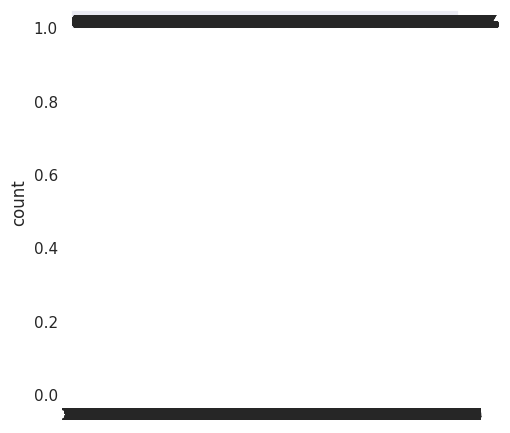

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Churn"])
perc_on_bar(ax, data["Churn"])

above is for churn plot

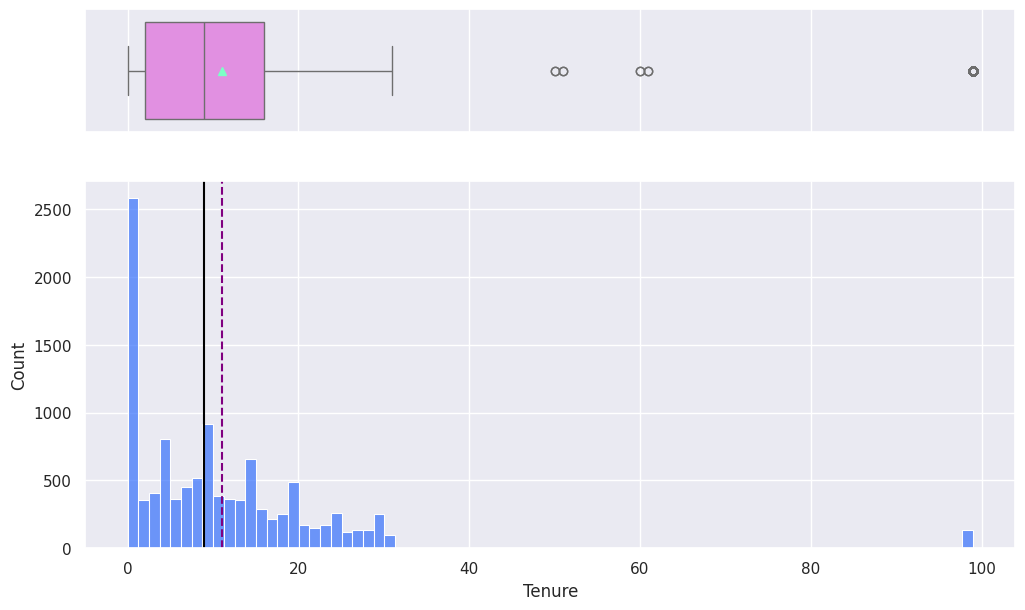

In [ ]:
histogram_boxplot(data, "Tenure")

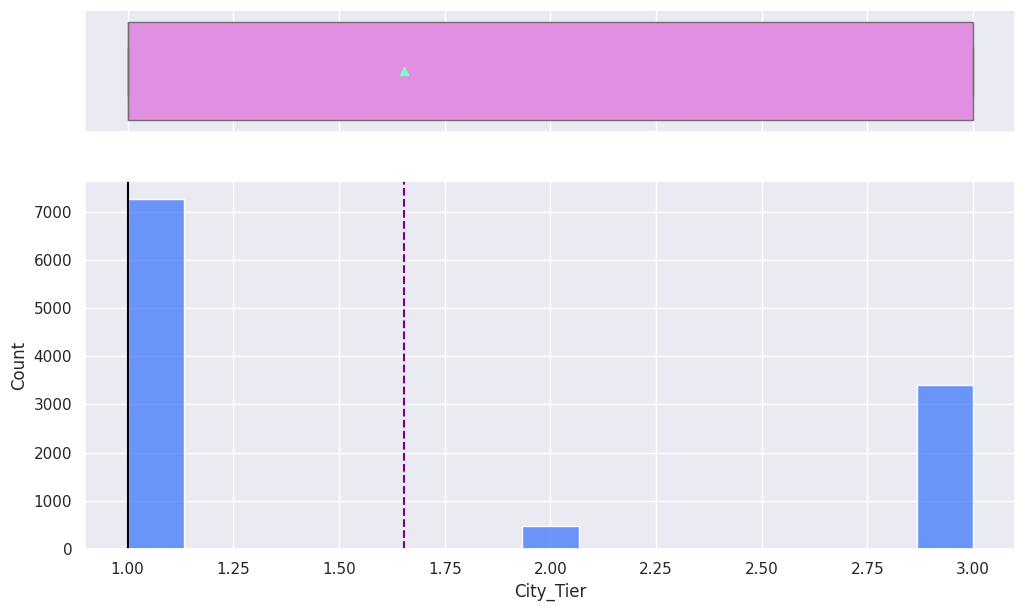

In [ ]:
histogram_boxplot(data, "City_Tier")

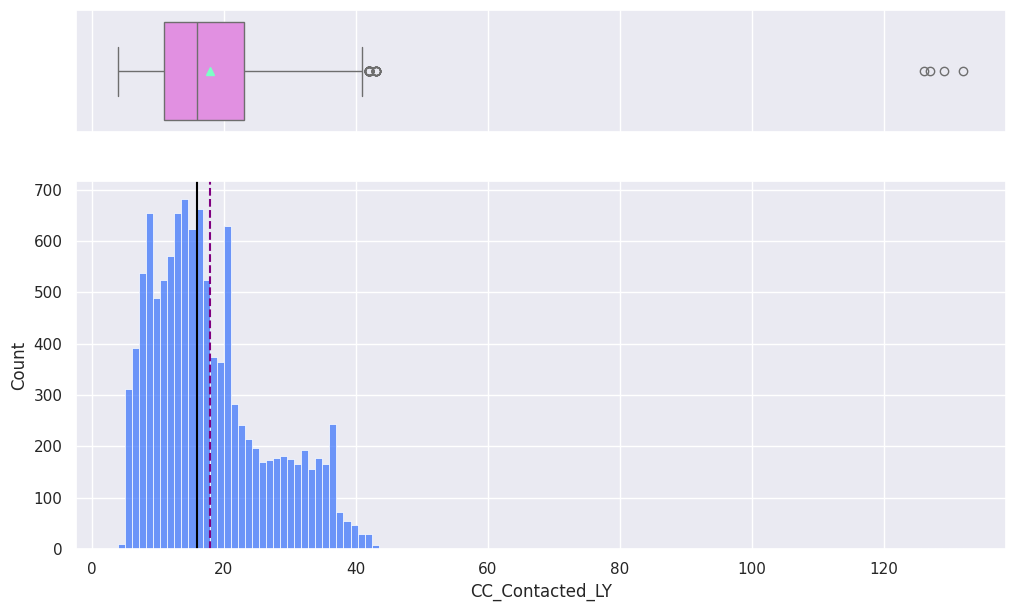

In [ ]:
histogram_boxplot(data, "CC_Contacted_LY")

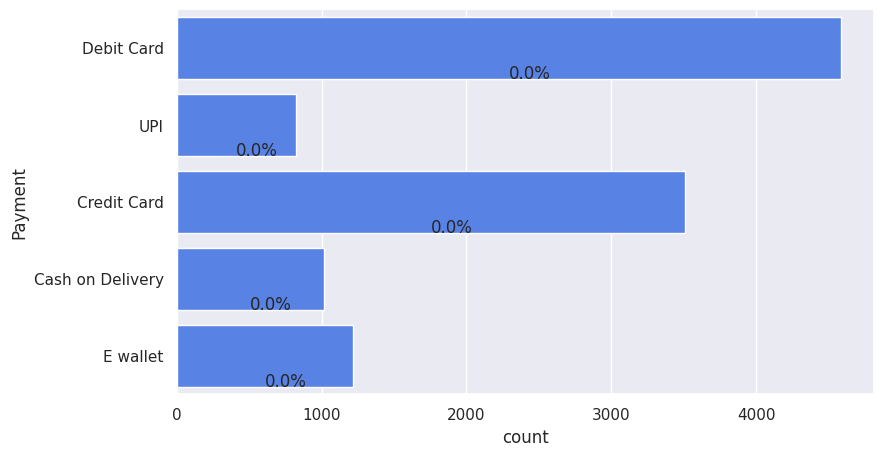

In [ ]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["Payment"])
perc_on_bar(ax, data["Payment"])

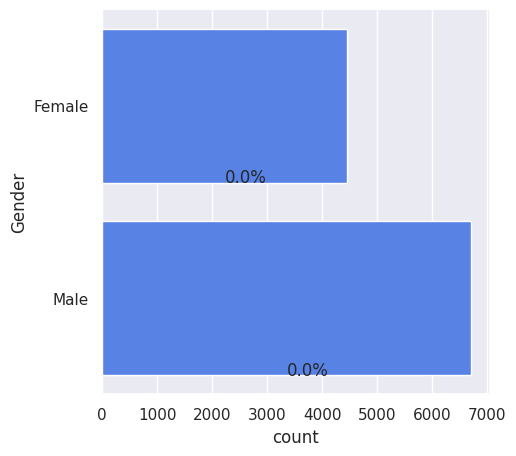

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Gender"])
perc_on_bar(ax, data["Gender"])

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data : dataframe
    predictor : independent variable
    target : target variable

    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="lower left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()


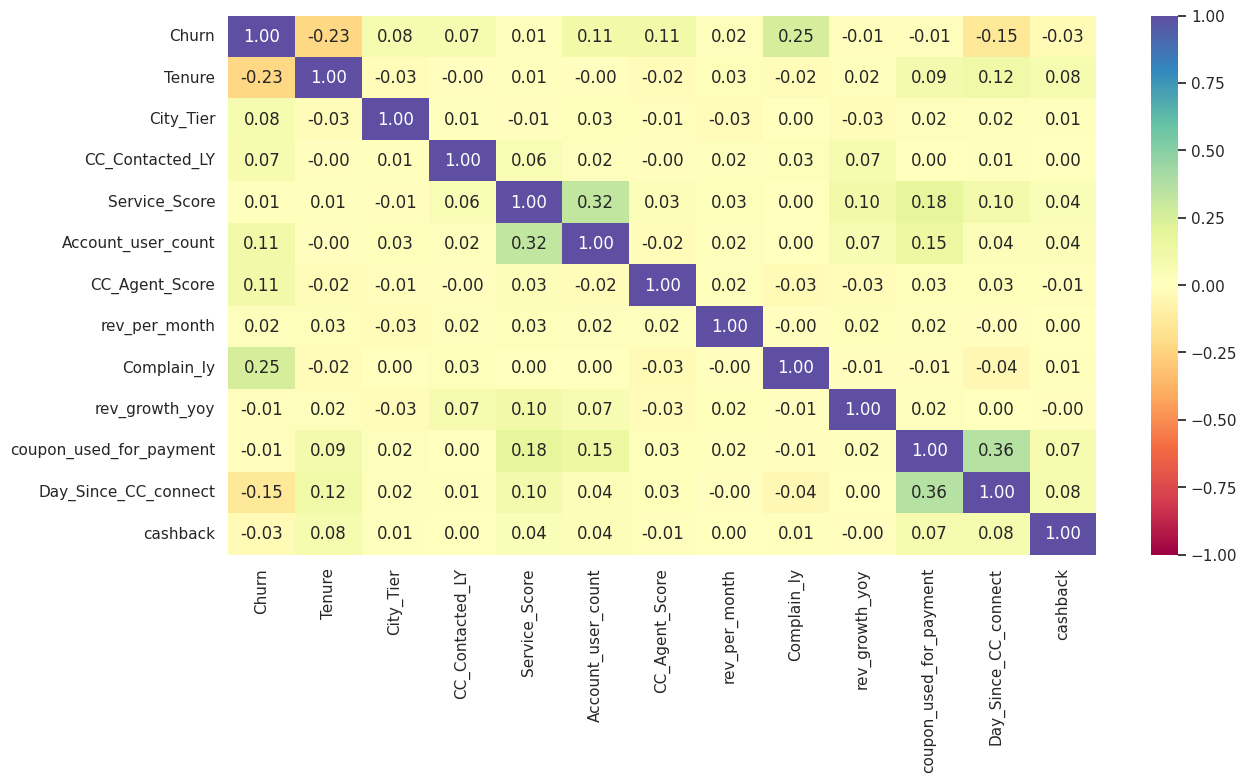

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(
    data.drop("AccountID", axis=1).corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

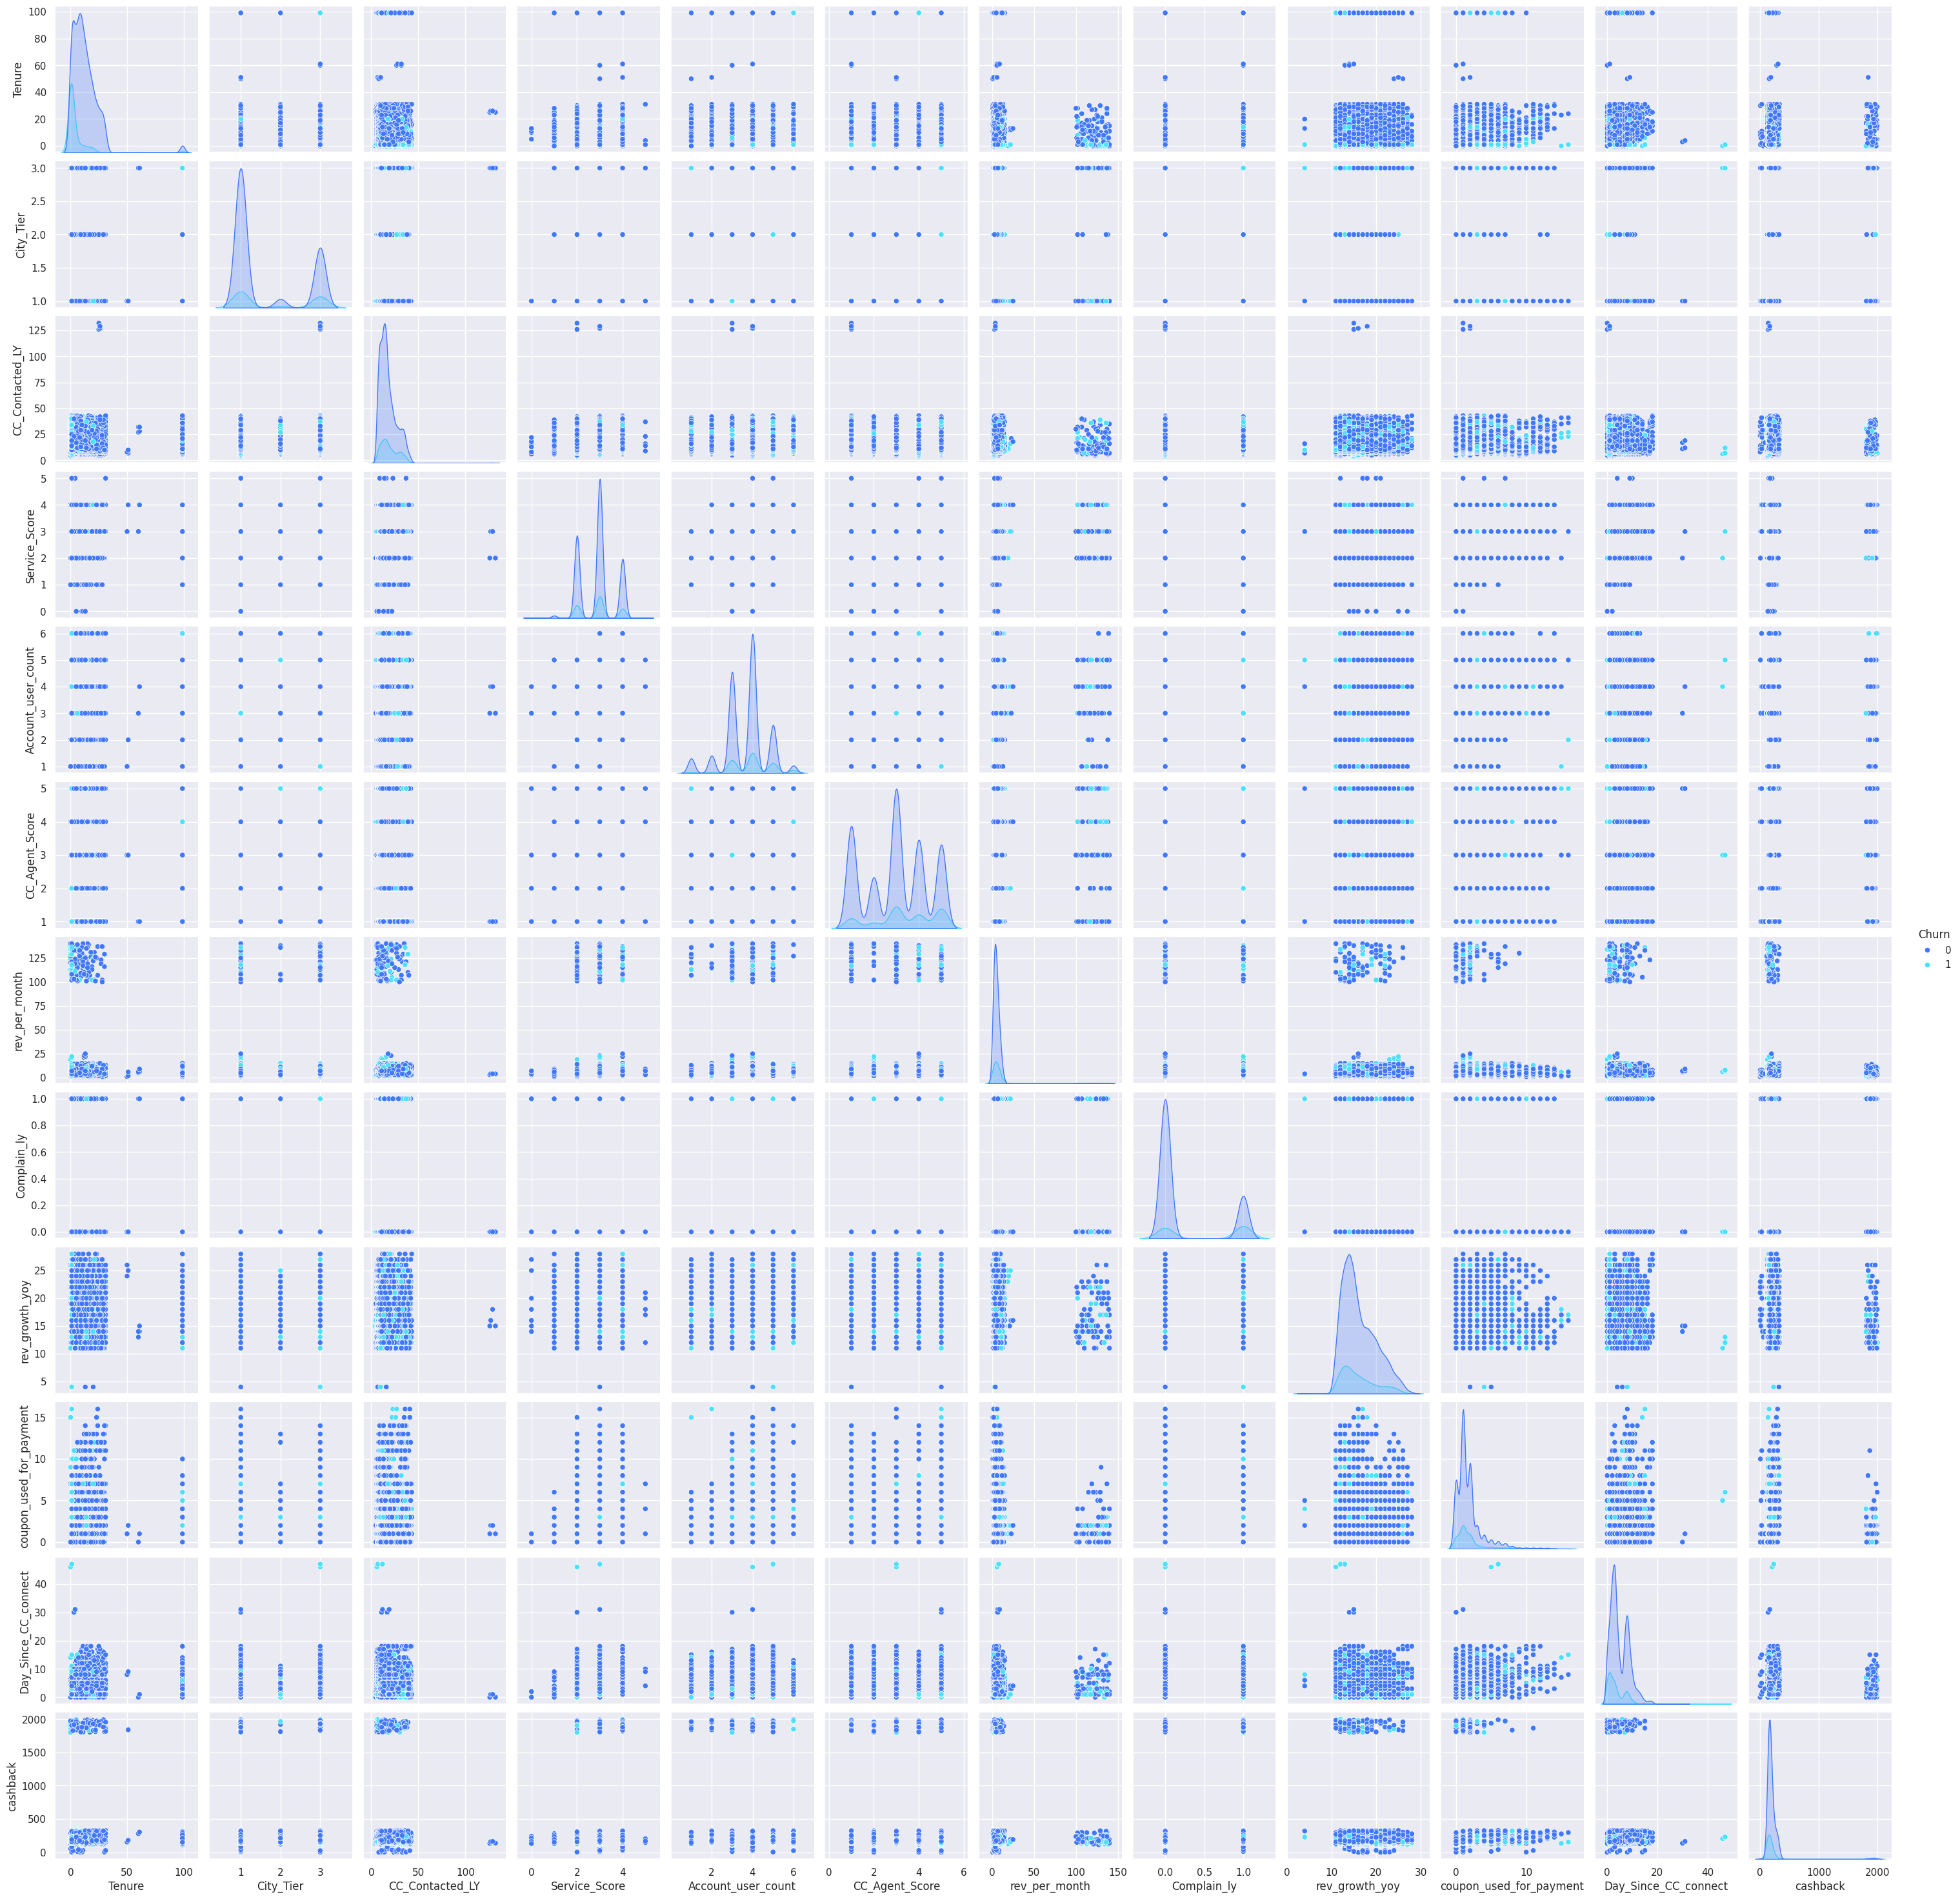

In [ ]:
sns.pairplot(data.drop("AccountID", axis=1), hue="Churn")
plt.show()


In [ ]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [ ]:
# statistical summary of customers who have churned

data[data["Churn"] == 1].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,1896.00,NaN,NaN,NaN,25560.58,3257.05,20000.00,22812.75,25625.50,28438.25,31251.00
Churn,1896.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Tenure,1848.00,NaN,NaN,NaN,4.33,12.07,0.00,0.00,1.00,3.00,99.00
City_Tier,1879.00,NaN,NaN,NaN,1.82,0.96,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,1878.00,NaN,NaN,NaN,19.29,8.91,4.00,12.00,17.00,26.00,43.00
Payment,1874,5,Debit Card,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1874,2,Male,1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,1880.00,NaN,NaN,NaN,2.92,0.70,2.00,2.00,3.00,3.00,4.00
Account_user_count,1830.00,NaN,NaN,NaN,3.94,1.02,1.00,3.00,4.00,5.00,6.00
account_segment,1878,5,Regular Plus,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cont_col = data[
    [
        "Tenure",
        "CC_Contacted_LY",
        "Service_Score",
        "CC_Agent_Score",
        "rev_per_month",
        "Complain_ly",
        "rev_growth_yoy",
        "coupon_used_for_payment",
        "Day_Since_CC_connect",
        "cashback",
    ]
]


In [ ]:
# Separating the dependent and independent variables

X = data.drop("Churn", axis=1)
y = data["Churn"]

In [ ]:

cols_to_impute = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Payment",
    "Gender",
    "Service_Score",
    "Account_user_count",
    "account_segment",
    "CC_Agent_Score",
    "Marital_Status",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
    "Login_device",
]


In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
payment = {
    "Debit Card": 0,
    "UPI": 1,
    "Credit Card": 2,
    "Cash on Delivery": 3,
    "E wallet": 4,
}
data["Payment"] = data["Payment"].map(payment)

gender = {"Female": 0, "Male": 1}
data["Gender"] = data["Gender"].map(gender)

account_segment = {
    "Super": 0,
    "Regular Plus": 1,
    "Regular": 2,
    "HNI": 3,
    "Super Plus": 4,
}
data["account_segment"] = data["account_segment"].map(account_segment)

marital_status = {"Single": 0, "Divorced": 1, "Married": 2}
data["Marital_Status"] = data["Marital_Status"].map(marital_status)

login_device = {"Mobile": 0, "Computer": 1, "Other": 2}
data["Login_device"] = data["Login_device"].map(login_device)

In [ ]:
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,3.00,6.00,Debit Card,Female,3.00,3.00,Super,2.00,Single,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,20001,1,0.00,1.00,8.00,UPI,Male,3.00,4.00,Regular Plus,3.00,Single,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,20002,1,0.00,1.00,30.00,Debit Card,Male,2.00,4.00,Regular Plus,3.00,Single,6.00,1.00,14.00,0.00,3.00,NaN,Mobile
3,20003,1,0.00,3.00,15.00,Debit Card,Male,2.00,4.00,Super,5.00,Single,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,20004,1,0.00,1.00,12.00,Credit Card,Male,2.00,3.00,Regular Plus,5.00,Single,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


In [ ]:
# Libraries required for data preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Library required to split the data
from sklearn.model_selection import train_test_split

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Testing set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in validation set : ")
print(y_val.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6756, 18)
Shape of Validation set :  (2252, 18)
Shape of Testing set :  (2252, 18)

 Percentage of classes in training set : 
0   0.83
1   0.17
Name: Churn, dtype: float64

 Percentage of classes in validation set : 
0   0.83
1   0.17
Name: Churn, dtype: float64

 Percentage of classes in test set : 
0   0.83
1   0.17
Name: Churn, dtype: float64


In [ ]:
print(X_train.isna().sum())
print("-" * 40)
print(X_val.isna().sum())
print("-" * 40)
print(X_test.isna().sum())

AccountID                    0
Tenure                     119
City_Tier                   65
CC_Contacted_LY             66
Payment                     74
Gender                      58
Service_Score               53
Account_user_count         252
account_segment             59
CC_Agent_Score              64
Marital_Status             122
rev_per_month              458
Complain_ly                209
rev_growth_yoy               0
coupon_used_for_payment      2
Day_Since_CC_connect       200
cashback                   274
Login_device               133
dtype: int64
----------------------------------------
AccountID                    0
Tenure                      52
City_Tier                   27
CC_Contacted_LY             11
Payment                     12
Gender                      26
Service_Score               21
Account_user_count          90
account_segment             18
CC_Agent_Score              25
Marital_Status              41
rev_per_month              173
Complain_ly     

In [ ]:
# Print the unique values in the 'cols_to_impute' columns
print(X_train[cols_to_impute].nunique())

# Identify rows with missing values in the 'cols_to_impute' columns
print(X_train[cols_to_impute].isnull().sum())

Tenure                       37
City_Tier                     3
CC_Contacted_LY              44
Payment                       5
Gender                        2
Service_Score                 6
Account_user_count            6
account_segment               5
CC_Agent_Score                5
Marital_Status                3
rev_per_month                54
Complain_ly                   2
rev_growth_yoy               19
coupon_used_for_payment      16
Day_Since_CC_connect         23
cashback                   4241
Login_device                  3
dtype: int64
Tenure                     119
City_Tier                   65
CC_Contacted_LY             66
Payment                     74
Gender                      58
Service_Score               53
Account_user_count         252
account_segment             59
CC_Agent_Score              64
Marital_Status             122
rev_per_month              458
Complain_ly                209
rev_growth_yoy               0
coupon_used_for_payment      2
Day_Since

In [ ]:
# Remove rows with string values in the 'cols_to_impute' columns
X_train = X_train[~X_train[cols_to_impute].isin(['Debit Card']).any(axis=1)]

In [ ]:
# Convert string values to numeric values using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train[cols_to_impute] = X_train[cols_to_impute].apply(label_encoder.fit_transform)

In [ ]:
print(len(cols_to_impute))

17


In [ ]:
print(X_train.shape[1])

18


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
df= pd.read_csv("/content/cleaned dataset.csv")
df.Churn.value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [ ]:
X_train=df.drop(["Churn"],axis=1)
y_train=df["Churn"]
X_test=pd.read_csv("/content/cleaned dataset.csv").drop(["Churn"],axis=1)
y_test=pd.read_csv("/content/cleaned dataset.csv")["Churn"]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train=pd.get_dummies(X_train, drop_first=True)
X_test=pd.get_dummies(X_test, drop_first=True)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
lr = LogisticRegression(solver="liblinear" )
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
accuracy_score(y_test, y_lr)

0.8755622188905547

In [ ]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93       572
        True       0.67      0.25      0.37        95

    accuracy                           0.88       667
   macro avg       0.78      0.62      0.65       667
weighted avg       0.86      0.88      0.85       667



In [ ]:
cm = confusion_matrix(y_test,y_lr)
print(cm)

[[560  12]
 [ 71  24]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

False    95
True     95
Name: Churn, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

       False       1.00      0.86      0.92       572
        True       0.54      1.00      0.70        95

    accuracy                           0.88       667
   macro avg       0.77      0.93      0.81       667
weighted avg       0.93      0.88      0.89       667



In [ ]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[492  80]
 [  0  95]]


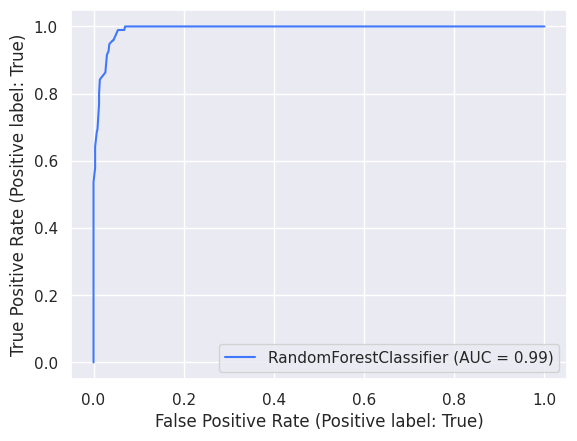

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
df=pd.read_csv('/content/cleaned dataset.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.50,97,31.37,351.60,80,29.89,215.80,90,9.71,8.70,4,2.35,1,False
1,IN,65,415,No,No,0,129.10,137,21.95,228.50,83,19.42,208.80,111,9.40,12.70,6,3.43,4,True
2,NY,161,415,No,No,0,332.90,67,56.59,317.80,97,27.01,160.60,128,7.23,5.40,9,1.46,4,True
3,SC,111,415,No,No,0,110.40,103,18.77,137.30,102,11.67,189.60,105,8.53,7.70,6,2.08,2,False
4,HI,49,510,No,No,0,119.30,117,20.28,215.10,109,18.28,178.70,90,8.04,11.10,1,3.00,1,False


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:

# Load the dataset
data = pd.read_csv("/content/cleaned dataset.csv")  # Replace "your_dataset.csv" with the actual filename/path


In [ ]:

# Preprocessing: Encode categorical variables if necessary
label_encoder = LabelEncoder()
data['International plan'] = label_encoder.fit_transform(data['International plan'])
data['Voice mail plan'] = label_encoder.fit_transform(data['Voice mail plan'])


In [ ]:

# Splitting the data into features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']


In [ ]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initializing the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)


In [ ]:
# Preprocessing: One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['State', 'International plan', 'Voice mail plan'], drop_first=True)

# Splitting the data into features and target variable
X = data_encoded.drop(columns=['Churn'])
y = data_encoded['Churn']


In [ ]:

# Preprocessing: One-hot encode categorical variables except for 'State'
data_encoded = pd.get_dummies(data.drop(columns=['State']), columns=['International plan', 'Voice mail plan'], drop_first=True)

# Encode 'State' separately
state_encoded = pd.get_dummies(data['State'], drop_first=True)

# Concatenate the encoded 'State' with the rest of the features
data_final = pd.concat([data_encoded, state_encoded], axis=1)

# Splitting the data into features and target variable
X = data_final.drop(columns=['Churn'])
y = data_final['Churn']


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:

pima = pd.read_csv("/content/cleaned dataset.csv", header=None)


In [ ]:
pima.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
2,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.4,12.7,6,3.43,4,True
3,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
4,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False


In [ ]:
#split dataset in features and target variable
feature_cols = ['Account_length', 'Total_day_calls', 'Total_eve_calls', 'Total_night_calls','Total_intl_calls','Churn']
X = pima[feature_cols] # Features
y = pima.label # Target variable


KeyError: "None of [Index(['Account_length', 'Total_day_calls', 'Total_eve_calls',\n       'Total_night_calls', 'Total_intl_calls', 'Churn'],\n      dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

# Loading the dataset
iris = load_iris()

#converting the data to a pandas dataframe
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

#creating a separate column for the target variable of iris dataset
data['Species'] = iris.target

#replacing the categories of target variable with the actual names of the species
target = np.unique(iris.target)
target_n = np.unique(iris.target_names)
target_dict = dict(zip(target, target_n))
data['Species'] = data['Species'].replace(target_dict)

# Separating the independent dependent variables of the dataset
x = data.drop(columns = "Species")
y = data["Species"]
names_features = x.columns
target_labels = y.unique()

# Splitting the dataset into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)

# Importing the Decision Tree classifier class from sklearn
from sklearn.tree import DecisionTreeClassifier

# Creating an instance of the classifier class
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)

# Fitting the training dataset to the model
dtc.fit(x_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize = (30, 10), facecolor = 'b')
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)
plt.show()
y_pred = dtc.predict(x_test)

# Finding the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)
axis = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))

# Plotting heatmap
sns.heatmap(matrix, annot = True, fmt = "g", ax = axis, cmap = "magma")
axis.set_title('Confusion Matrix')
axis.set_xlabel("Predicted Values", fontsize = 10)
axis.set_xticklabels([''] + target_labels)
axis.set_ylabel( "True Labels", fontsize = 10)
axis.set_yticklabels(list(target_labels), rotation = 0)
plt.show()